In [1]:
import sys
import os
pjoin = os.path.join
%load_ext autoreload
%autoreload 2
assert 'DATASET_ROOT' in os.environ, 'Please set $DATASET_ROOT'
from VITALabAI.model.complexity.cumulative_gradient.lib import read_ds
from VITALabAI.model.complexity.cumulative_gradient.visualize import test_job, plot_with_err, visualize
from itertools import product
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''
from VITALabAI.model.complexity.cumulative_gradient.config import make_config
%matplotlib notebook


# All the config available
t_sne_params = {'embd': None, 'tsne': True}
none_params = {'embd': None, 'tsne': False}
embd_params = {'embd': 'embd', 'tsne': False}
cnn_params = {'embd': 'cnn_embd', 'tsne': False}
cnn_tsne_param = {'embd': 'cnn_embd', 'tsne': True}
embd_tsne_param = {'embd': 'embd', 'tsne': True}
vgg_params = {'embd': 'vgg', 'tsne': True}
xception_params = {'embd': 'xception', 'tsne': True}
params = [t_sne_params, none_params, cnn_params, embd_params]

Using TensorFlow backend.


# Why we use cummax
See in the following cells that if we just summed the eigenvalues, mnist_4 would be easier than cifar10


 90%|█████████ | 9/10 [09:07<00:50, 50.33s/it]

['Changhe' 'Lifan' 'Lotus' 'Opel' 'Citroen' 'Ferrari' 'Zinoro' 'Audi' 'Baojun' 'Wisemann']


100%|██████████| 10/10 [10:03<00:00, 52.05s/it]

Done!


<IPython.core.display.Javascript object>


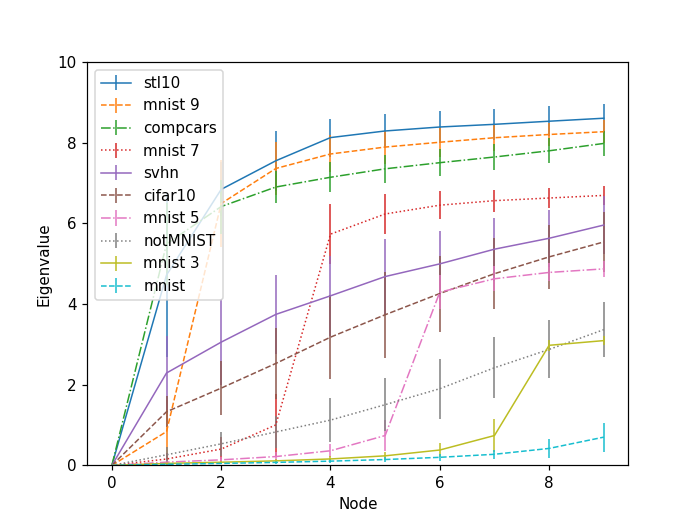

<IPython.core.display.Javascript object>


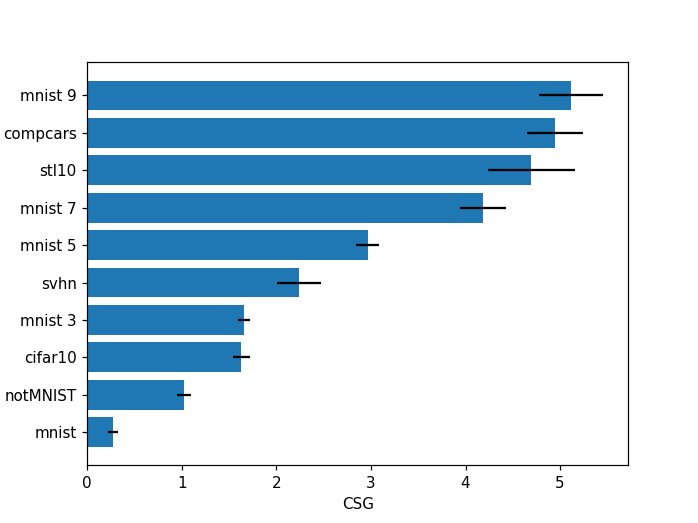

In [2]:
params = cnn_tsne_param

datasets = [{'ds_name': 'mnist',
             'shuffled_class': k} for k in range(3, 11, 2)]
datasets += [{'ds_name': l} for l in ['mnist', 'cifar10', 'notMNIST', 'svhn', 'stl10', 'compcars']]
args = [make_config(**k, **v) for k, v in (product(datasets, [params]))]
valss2 = [test_job(config=k, k_nearest=3, isomap=None, M_sample=100) for k in tqdm(args)]
print("Done!")
plot_with_err(*valss2)

In [2]:
params = t_sne_params

datasets = [{'ds_name': 'mnist',
             'shuffled_class': k} for k in range(2, 6)]
datasets += [{'ds_name': l} for l in ['mnist', 'cifar10', 'notMNIST', 'svhn', 'stl10', 'compcars']]
args = [make_config(**k, **v) for k, v in (product(datasets, [params]))]
valss2 = [test_job(config=k, k_nearest=3, isomap=None, M_sample=100) for k in tqdm(args)]
print("Done!")
plot_with_err(*valss2)

 10%|█         | 1/10 [01:20<12:01, 80.15s/it]

KeyboardInterrupt: 

# Runs for papers


 67%|██████▋   | 4/6 [02:54<01:27, 43.66s/it]

['Changhe' 'Lifan' 'Lotus' 'Opel' 'Citroen' 'Ferrari' 'Zinoro' 'Audi' 'Baojun' 'Wisemann']



100%|██████████| 6/6 [05:35<00:00, 64.72s/it]


<IPython.core.display.Javascript object>


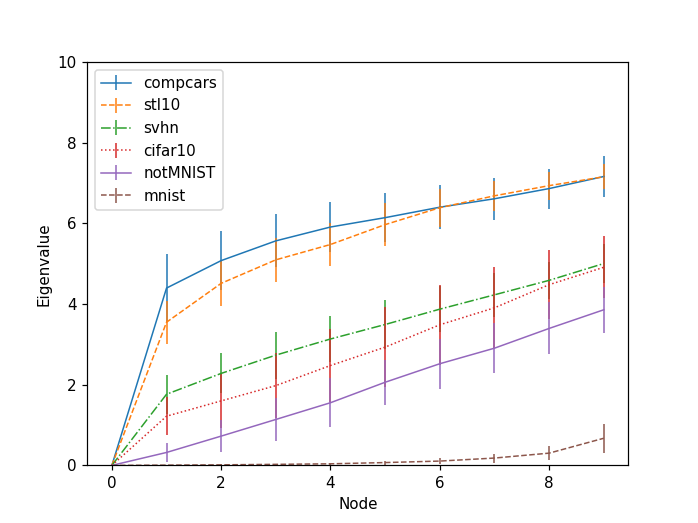

<IPython.core.display.Javascript object>


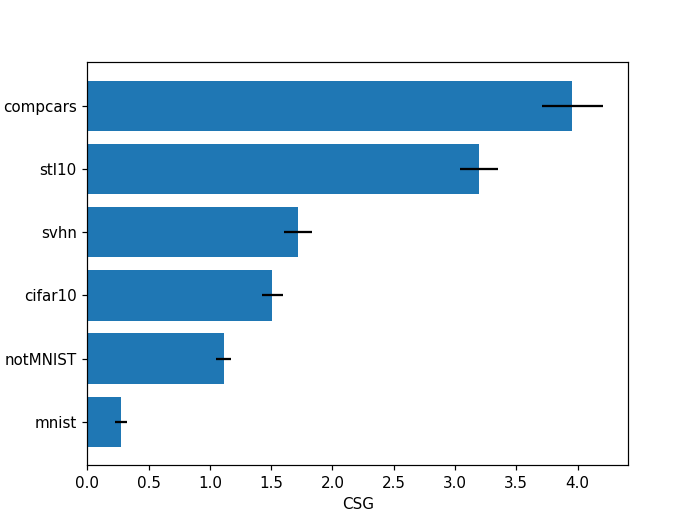

In [3]:
params = [t_sne_params]
datasets = ['mnist', 'cifar10', 'notMNIST', 'stl10', 'compcars', 'svhn']
args = [make_config(k, **v) for k, v in (product(datasets, params))]
valss = [test_job(config=k, k_nearest=3, isomap=None, M_sample=100) for k in tqdm(args)]
plot_with_err(*valss)


100%|██████████| 6/6 [19:03<00:00, 210.92s/it]


<IPython.core.display.Javascript object>


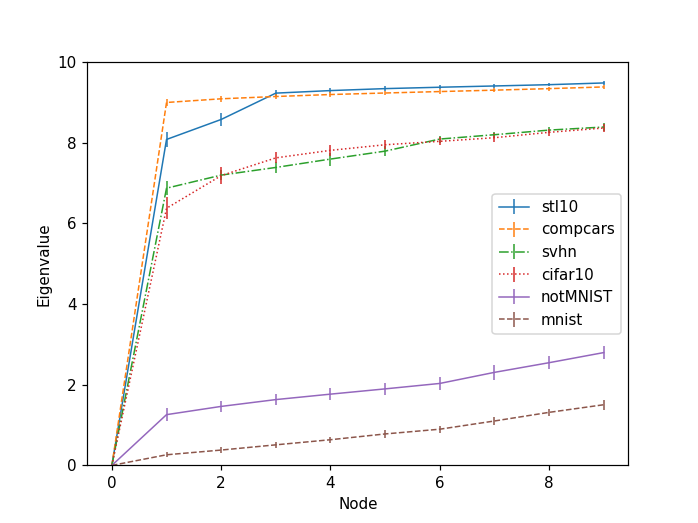

<IPython.core.display.Javascript object>


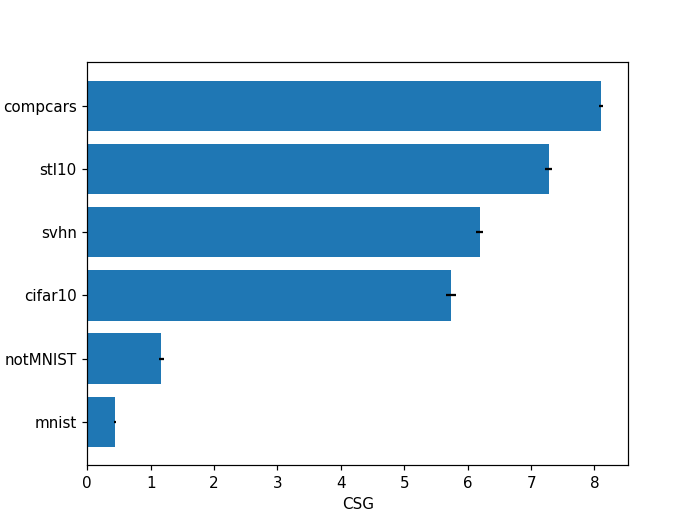

In [4]:
params = [cnn_params]
datasets = ['mnist', 'cifar10', 'notMNIST', 'stl10', 'compcars', 'svhn']
args = [make_config(k, **v) for k, v in (product(datasets, params))]
valss = [test_job(config=k, k_nearest=3, isomap=None, M_sample=100) for k in tqdm(args)]
plot_with_err(*valss)


100%|██████████| 6/6 [03:53<00:00, 44.28s/it]


<IPython.core.display.Javascript object>


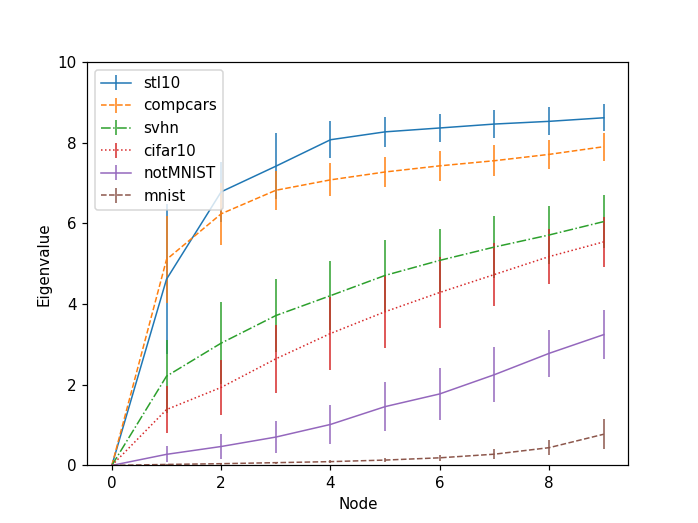

<IPython.core.display.Javascript object>


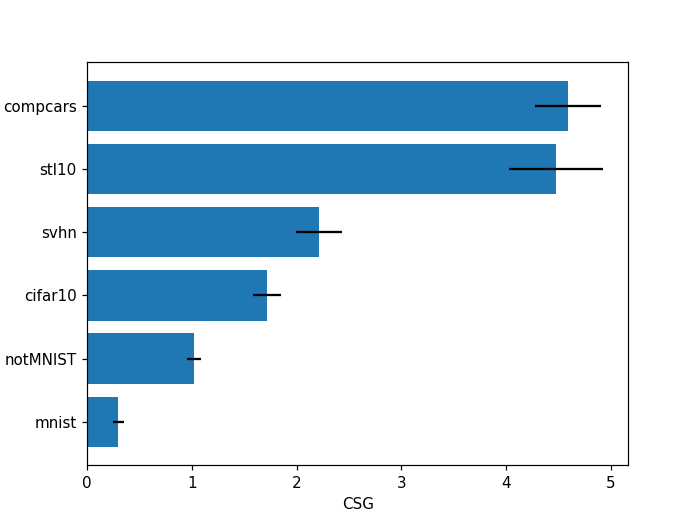

In [5]:
params = [cnn_tsne_param]
datasets = ['mnist', 'cifar10', 'notMNIST', 'stl10', 'compcars', 'svhn']
args = [make_config(k, **v) for k, v in (product(datasets, params))]
valss = [test_job(config=k, k_nearest=3, isomap=None, M_sample=100) for k in tqdm(args)]
plot_with_err(*valss)

# Noise
Sanity test using noisy MNIST and noisy CIFAR10

In [6]:
params = [t_sne_params]
datasets = [{'ds_name': 'mnist',
                 'shuffled_class': k} for k in range(2, 11)]
args = [make_config(**k, **v) for k, v in (product(datasets, params))]
valss = [test_job(config=k, k_nearest=3, isomap=None, M_sample=100) for k in tqdm(args)]
plot_with_err(*valss)


100%|██████████| 9/9 [11:04<00:00, 76.56s/it]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

params = [cnn_tsne_param]
datasets = [{'ds_name': 'mnist',
                 'shuffled_class': k} for k in range(2, 11)] + [{'ds_name':'mnist'}]
args = [make_config(**k, **v) for k, v in (product(datasets, params))]
valss = [test_job(config=k, k_nearest=3, isomap=None, M_sample=100) for k in tqdm(args)]
plot_with_err(*valss)

In [ ]:
params = [cnn_tsne_param]
datasets = [{'ds_name': 'cifar10',
                 'shuffled_class': k} for k in range(2, 11)] + [{'ds_name':'cifar10'}]
args = [make_config(**k, **v) for k, v in (product(datasets, params))]
valss = [test_job(config=k, k_nearest=3, isomap=None, M_sample=100) for k in tqdm(args)]
plot_with_err(*valss)

# Less samples
Experiments using a reduced number of samples



  0%|          | 0/7 [00:00<?, ?it/s]


 14%|█▍        | 1/7 [00:05<00:35,  5.96s/it]

 29%|██▊       | 2/7 [00:26<00:50, 10.18s/it]

 43%|████▎     | 3/7 [00:54<01:02, 15.53s/it]

 57%|█████▋    | 4/7 [01:33<01:08, 22.82s/it]

 71%|███████▏  | 5/7 [02:27<01:04, 32.21s/it]

 86%|████████▌ | 6/7 [03:30<00:41, 41.28s/it]

100%|██████████| 7/7 [03:36<00:00, 30.75s/it]



<IPython.core.display.Javascript object>


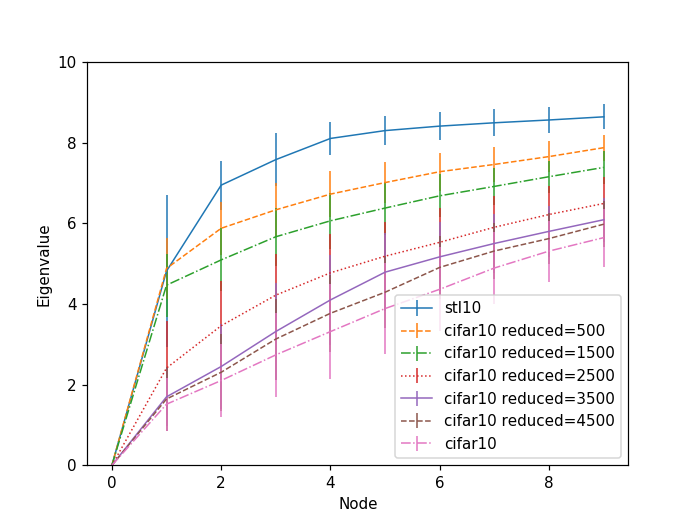

<IPython.core.display.Javascript object>


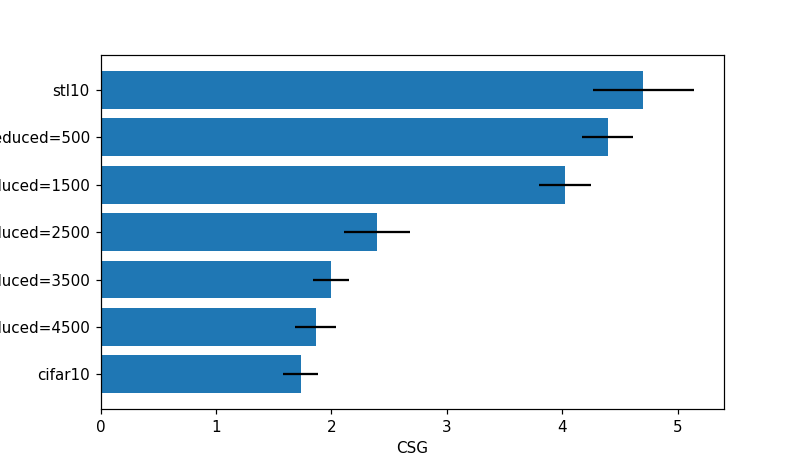

In [8]:
params = [cnn_tsne_param]
datasets = [{'ds_name': 'cifar10',
                 'small': k} for k in [500, 1500, 2500, 3500, 4500, None]] + [{'ds_name':'stl10'}]
args = [make_config(**k, **v) for k, v in (product(datasets, params))]
valss = [test_job(config=k, k_nearest=3, isomap=None, M_sample=100) for k in tqdm(args)]
plot_with_err(*valss)

In [ ]:

params = [t_sne_params]
datasets = [{'ds_name': 'cifar10',
                 'small': k} for k in [500,1000, 1500, 2500, 3500, 4500, None]] + [{'ds_name':'stl10'}]
args = [make_config(**k, **v) for k, v in (product(datasets, params))]
valss = [test_job(config=k, k_nearest=3, isomap=None, K_sample=100) for k in tqdm(args)]
plot_with_err(*valss)

## Experiments on 2 classes

In [ ]:
params = [t_sne_params]
datasets = ['inria', 'seefood']
args = [make_config(k, **v) for k, v in (product(datasets, params))]
valss = [test_job(config=k, k_nearest=3, isomap=None, K_sample=100) for k in tqdm(args)]
plot_with_err(*valss)

In [ ]:
params = [cnn_tsne_param]
datasets = ['inria', 'seefood']
args = [make_config(k, **v) for k, v in (product(datasets, params))]
valss = [test_job(config=k, k_nearest=3, isomap=None, K_sample=100) for k in args]
plot_with_err(*valss)

# Graphs

In [ ]:
visualize(args=make_config('cifar10',embd='cnn_embd', tsne=False), k_nearest=3, isomap=None, M_sample=250)
visualize(args=make_config('mnist',embd='cnn_embd', tsne=False), k_nearest=3, isomap=None, M_sample=250)
visualize(args=make_config('stl10',embd='cnn_embd', tsne=False), k_nearest=3, isomap=None, M_sample=250)
visualize(args=make_config('miotcd',embd='cnn_embd', tsne=False), k_nearest=3, isomap=None, M_sample=250)